In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
# Step 2: Load the CSV file into a DataFrame
df = pd.read_csv('amazon_playstation_5_products.csv')

In [18]:
# Step 3: Inspect the data
print("Initial Data:")
print(df.head())  # View the first few rows
print(df.info())  # Check for missing values and data types

Initial Data:
                                               Title   Price  \
0           PlayStation 5 (Slim) - (Renewed Premium)  449.99   
1  PlayStation®5 console (slim) with EA SPORTS Co...  568.00   
2          PlayStation 5 Digital Edition - CFI-1102B     NaN   
3    $150 PlayStation Store Gift Card [Digital Code]  150.00   
4  PS5 Slim Stand and Cooling Station with Dual C...   12.49   

                  Rating  
0                      4  
1                      3  
2           Oct 22, 2021  
3  ESRB Rating: Everyone  
4                     12  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Title   21 non-null     object 
 1   Price   18 non-null     float64
 2   Rating  21 non-null     object 
dtypes: float64(1), object(2)
memory usage: 632.0+ bytes
None


In [19]:
# Step 4: Handle Missing Values
# Drop rows where Title or Price is missing
df.dropna(subset=['Title', 'Price'], inplace=True)

In [20]:
# Replace missing ratings with 0
df['Rating'].fillna(0, inplace=True)

In [21]:
# Convert Rating to numeric (already done; ensure any remaining conversion issues are handled)
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce').fillna(0)  # Convert invalid ratings to 0

In [22]:
# Step 6: Handle Inconsistent Data
# Remove outliers in Price column (if necessary)
# Adjust price range based on your dataset, here we're using an example range
df = df[(df['Price'] > 0) & (df['Price'] < 1000)]  # Example range for valid prices

# Standardize Title text (convert to lowercase and remove leading/trailing spaces)
df['Title'] = df['Title'].str.lower().str.strip()

# Step 7: Create New Columns (Optional)
# Create a Price Range column
df['Price Range'] = pd.cut(df['Price'], bins=[0, 300, 500, 700, 1000], labels=['Low', 'Medium', 'High', 'Very High'])

In [23]:
# Step 8: Verify the Cleaned Data
print("Cleaned Data:")
print(df.head())
print(df.info())

Cleaned Data:
                                               Title   Price  Rating  \
0           playstation 5 (slim) - (renewed premium)  449.99     4.0   
1  playstation®5 console (slim) with ea sports co...  568.00     3.0   
3    $150 playstation store gift card [digital code]  150.00     0.0   
4  ps5 slim stand and cooling station with dual c...   12.49    12.0   
6      ea sports college football 25 - playstation 5   69.00     0.0   

  Price Range  
0      Medium  
1        High  
3         Low  
4         Low  
6         Low  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 0 to 20
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Title        18 non-null     object  
 1   Price        18 non-null     float64 
 2   Rating       18 non-null     float64 
 3   Price Range  18 non-null     category
dtypes: category(1), float64(2), object(1)
memory usage: 798.0+ bytes
None


In [24]:

# Step 9: Save the Cleaned Data
df.to_csv('cleaned_amazon_playstation_5_products.csv', index=False)

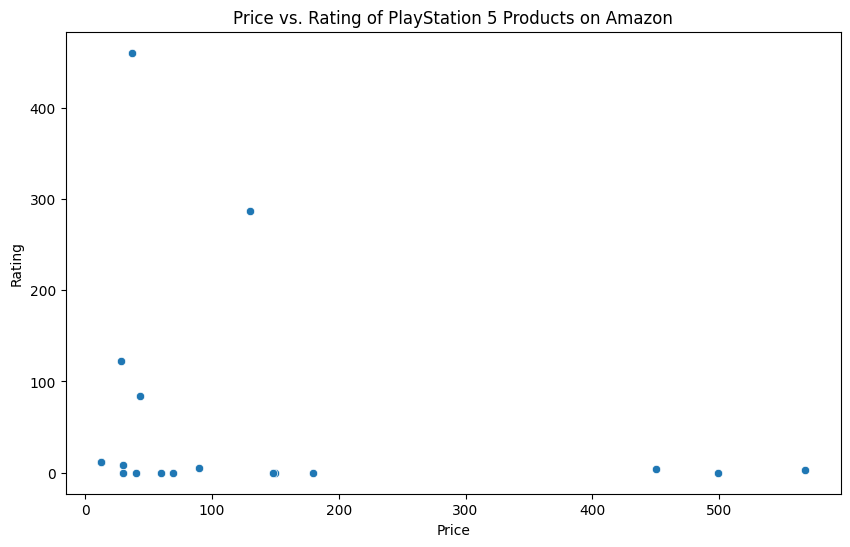

In [26]:
# 1. Price vs. Rating Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Rating', data=df)
plt.title('Price vs. Rating of PlayStation 5 Products on Amazon')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()

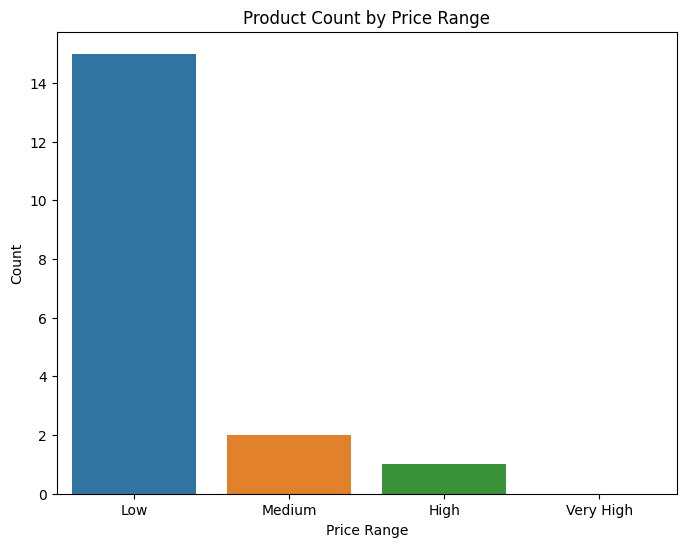

In [27]:
# 2. Product Count by Price Range
plt.figure(figsize=(8, 6))
sns.countplot(x='Price Range', data=df)
plt.title('Product Count by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()

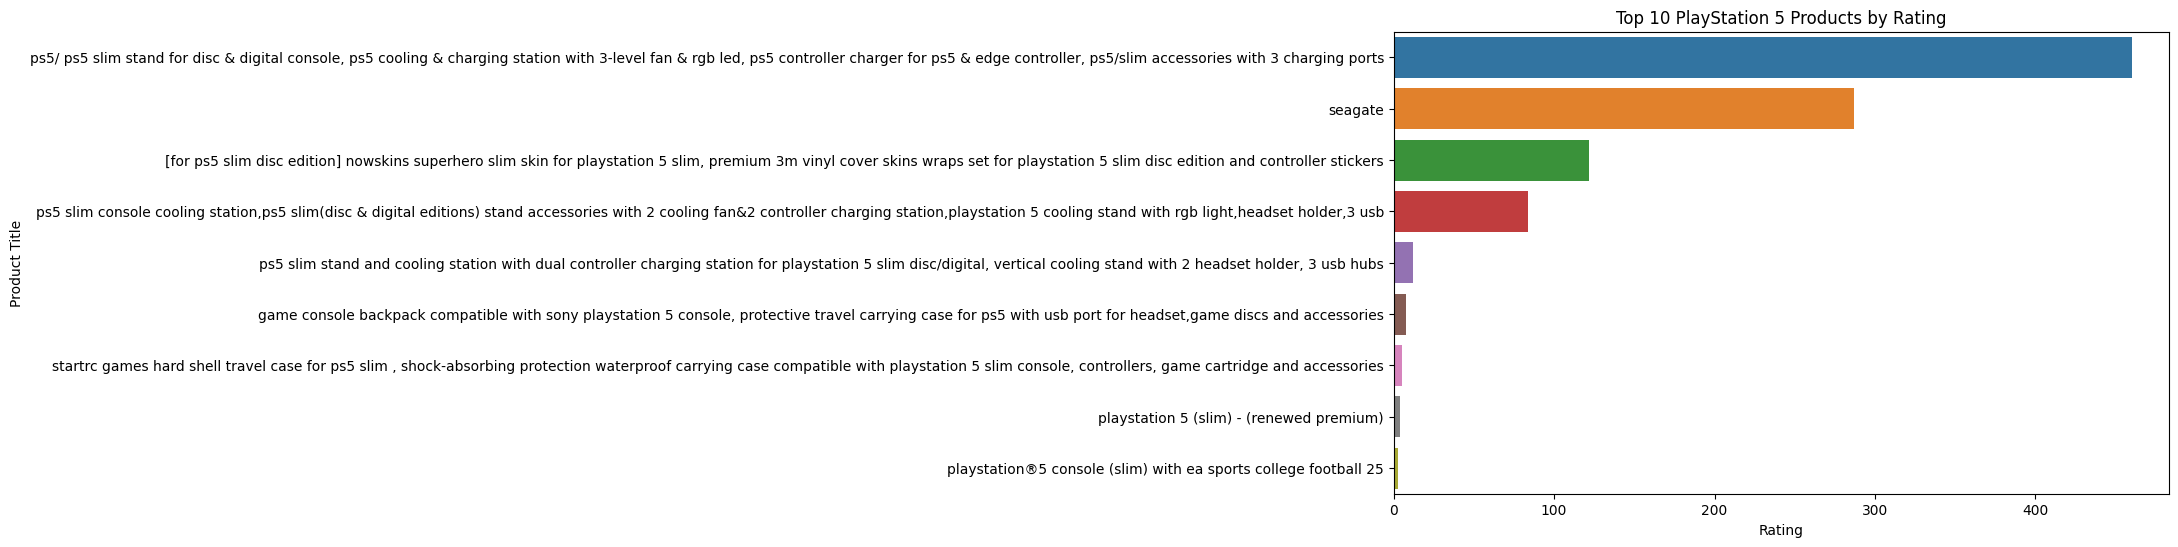

In [28]:
# 3. Top Products by Rating
top_rated_products = df.sort_values(by='Rating', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='Rating', y='Title', data=top_rated_products)
plt.title('Top 10 PlayStation 5 Products by Rating')
plt.xlabel('Rating')
plt.ylabel('Product Title')
plt.show()

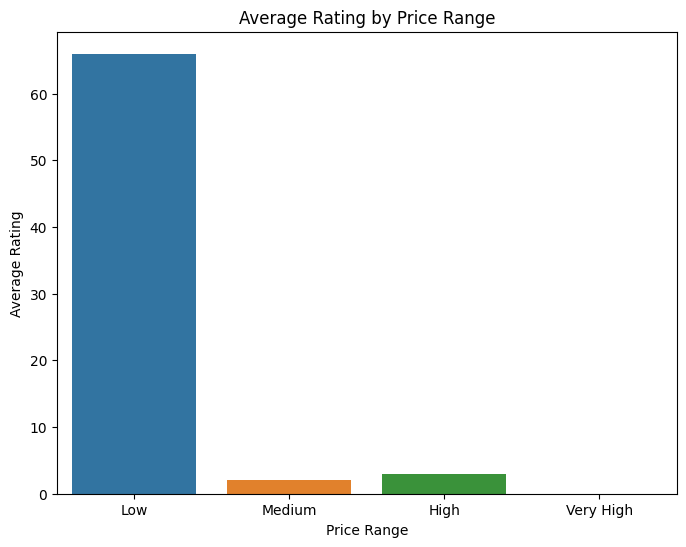

In [29]:
# 4. Price Range vs. Average Rating
avg_rating_by_price_range = df.groupby('Price Range')['Rating'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='Price Range', y='Rating', data=avg_rating_by_price_range)
plt.title('Average Rating by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average Rating')
plt.show()

In [30]:
# 5. Predicting Potential Sales (based on Rating and Price)
# We assume that products with higher ratings and lower prices are likely to sell more
df['Sales Score'] = df['Rating'] / df['Price']  # Simplistic measure of sales potential
top_sales_products = df.sort_values(by='Sales Score', ascending=False).head(10)

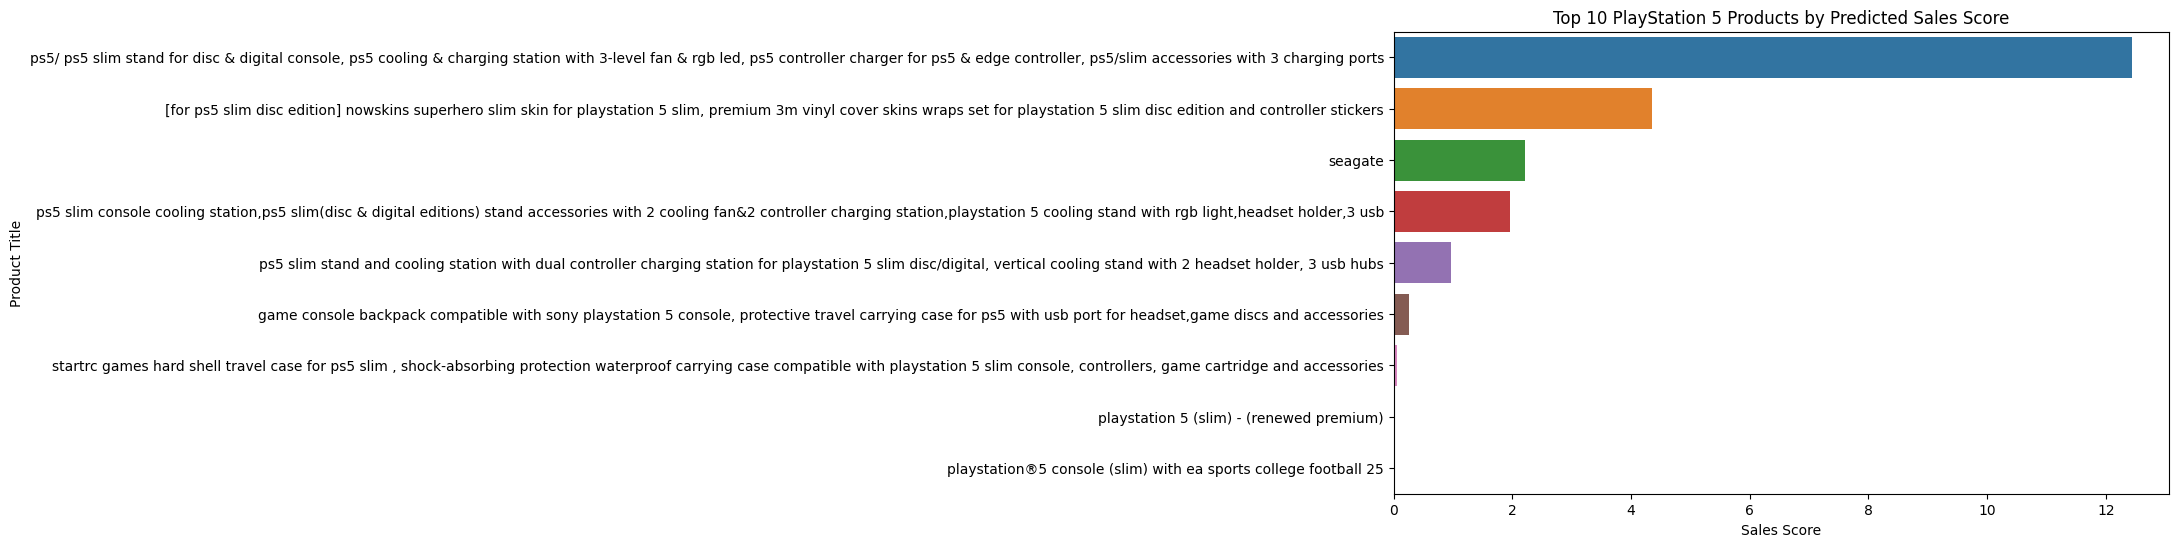

In [31]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Sales Score', y='Title', data=top_sales_products)
plt.title('Top 10 PlayStation 5 Products by Predicted Sales Score')
plt.xlabel('Sales Score')
plt.ylabel('Product Title')
plt.show()